Hineill David Céspedes Espinoza - 20213704

PREGUNTA 1: IDENTIFICACIÓN DE SISTEMAS

En este problema vamos a aplicar las técnicas aprendidas en el curso para la identificación de
algunos sistemas desconocidos. Por cada sistema desconocido van a ser proporcionadas secuencias
de entrada x[n] y de salida y[n].

1. Sistema lineal e invariante en el tiempo (LTI - Linear Time Invariant)

Dado un sistema LTI con respuesta impulsiva h[n], la relación entre la entrada y la salida
del sistema están dadas por
y[n] = Xn
k=−∞
x[k]h[n − k] + w[n]
donde w[n] es una señal de ruido blanco gaussiano con media cero y varianza desconocida.
Utilizar un filtro FIR de longitud 10 (es decir con 10 coeficientes) para identificar el sistema

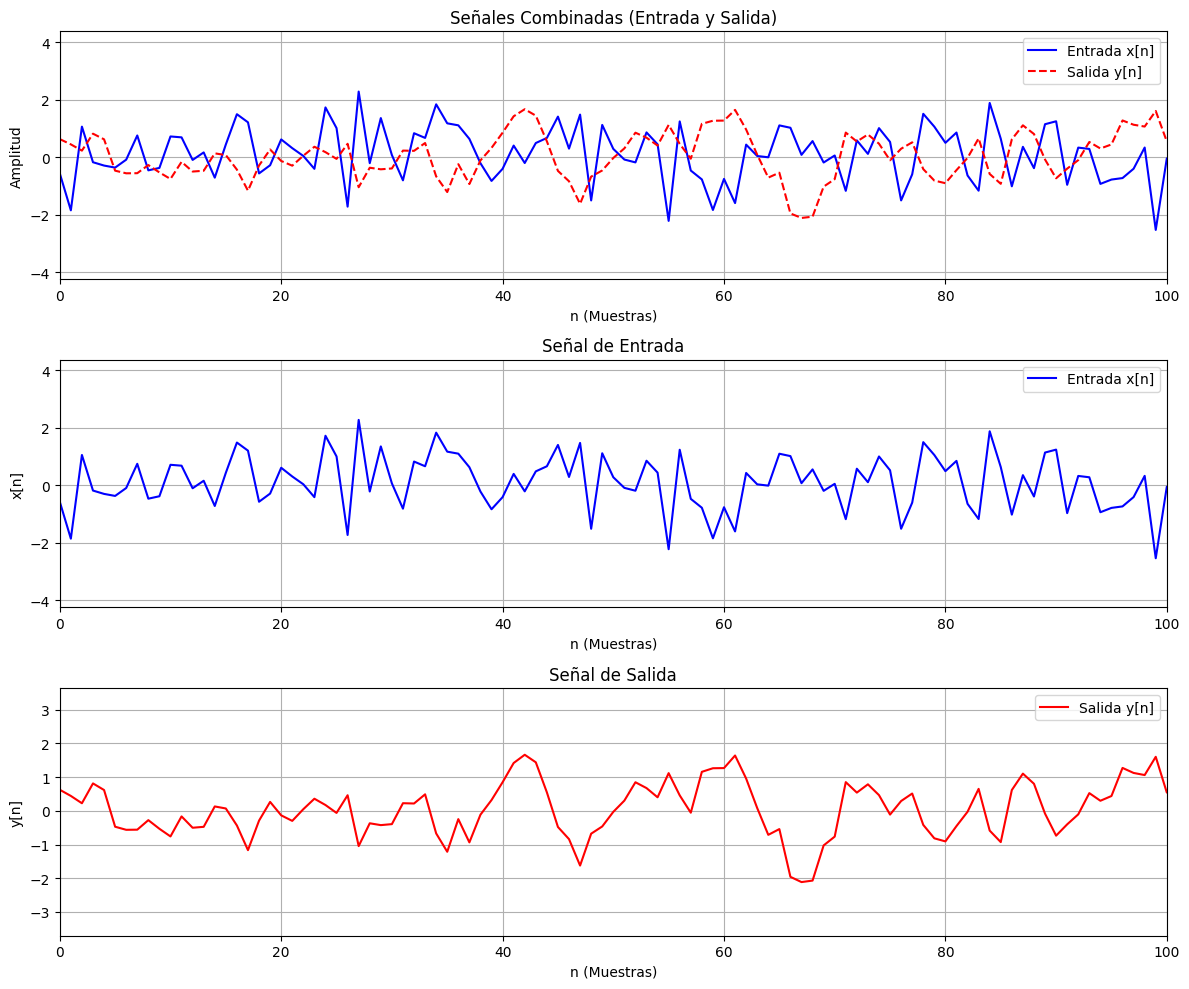

In [ ]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.linalg import toeplitz
#Cargar datos del archivo CSV
datos  = ''
with open('lti.csv', newline='') as f:
    data =  csv.reader(f, delimiter=" ")
    datos=list(data)
input_lti = datos[0]
output_lti = datos[1]
# Convertir los datos de input y output en arrays de tipo float
input_lti = np.array(input_lti, dtype=float)  
output_lti = np.array(output_lti, dtype=float)
# Crear un vector de tiempo (asume índices desde 0 hasta N-1)
n = np.arange(len(input_lti))
# Crear las gráficas
plt.figure(figsize=(12, 10))
# Gráfica 1: Señales combinadas (Entrada y Salida juntas)
plt.subplot(3, 1, 1)  # Primera gráfica (3 filas, 1 columna, posición 1)
plt.plot(n, input_lti, label='Entrada x[n]', color='blue')
plt.plot(n, output_lti, label='Salida y[n]', color='red', linestyle='--')
plt.title('Señales Combinadas (Entrada y Salida)')
plt.xlabel('n (Muestras)')
plt.xlim([0,20])
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
# Gráfica 2: Señal de Entrada x[n] (separada)
plt.subplot(3, 1, 2)  # Segunda gráfica (3 filas, 1 columna, posición 2)
plt.plot(n, input_lti, label='Entrada x[n]', color='blue')
plt.title('Señal de Entrada')
plt.xlabel('n (Muestras)')
plt.ylabel('x[n]')
plt.xlim([0,100])

plt.grid(True)
plt.legend()
# Gráfica 3: Señal de Salida y[n] (separada)
plt.subplot(3, 1, 3)  # Tercera gráfica (3 filas, 1 columna, posición 3)
plt.plot(n, output_lti, label='Salida y[n]', color='red')
plt.title('Señal de Salida')
plt.xlabel('n (Muestras)')
plt.ylabel('y[n]')
plt.xlim([0,20])

plt.grid(True)
plt.legend()
# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
# Mostrar todas las gráficas
plt.show()

[-4.43754747e-01  2.39973802e-03 -9.42767115e-03 -1.23927947e-02
  9.53807689e-05 -5.41266074e-03 -4.10567524e-03  5.39485822e-03
  1.90154988e-03  3.42505550e-03 -1.45304042e-03 -6.84007118e-03
 -5.09860078e-03 -1.00064482e-04 -1.00967129e-02 -1.17290776e-02
  7.24724121e-03 -2.93129174e-03  9.65187066e-03  9.38326129e-03
  5.31628211e-03  7.05475339e-03 -9.70113094e-04  1.22082642e-03
 -9.29669561e-03 -8.06023173e-03 -2.20942133e-02 -1.57900322e-02
 -1.20929452e-02 -1.01945180e-02 -6.88221458e-03 -6.12860807e-03
  1.22393863e-02  9.06844633e-03  1.20486620e-02  8.88266163e-03
  9.35689654e-03  1.68771296e-02  1.12448617e-02  4.25990814e-03
 -8.68721383e-05  2.57666908e-03 -3.93126948e-03 -2.47637932e-03
 -1.56568097e-03  3.57703463e-03  5.20103355e-03 -1.17695068e-03
 -1.27204152e-02 -1.28483598e-02 -1.24383504e-02 -1.12013339e-02
 -4.61633782e-03  8.58436445e-03  1.23946040e-02  5.76606468e-03
 -3.29341546e-03 -8.63541403e-03 -1.43109998e-02 -1.73258102e-02
 -1.01044475e-02 -8.15722

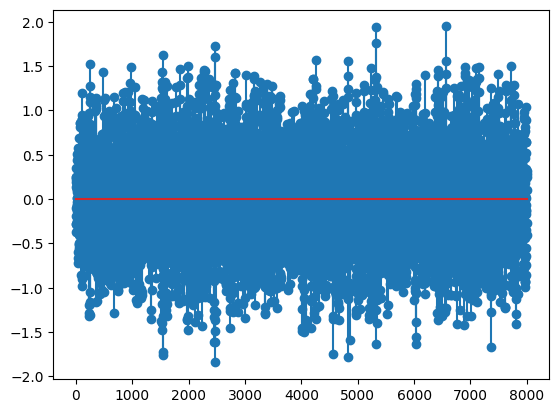

In [ ]:
from scipy import signal
#Dada la forma en la que se expresan las funciones asumimos q x[n] = d[n] +  w[n] , donde d[n] es la señal deseada y es la salida del sistema q deseamos encontrar 
# Entonces diseñamos el filtro wienner como w_opt  =  Rx ^-1  *  r_dx
# Señales de entrada (observada) y salida (deseada)
signal_x = np.array(input_lti, dtype=float)  # Señal observada (entrada)
gn = np.random.randn(len(signal_x))
signal_d = np.array(output_lti, dtype=float)  # Señal deseada (salida)
# Longitud del filtro Wiener
def calcular_coeficientes_filtro_wiener(input , num_coe ,  salida):
    N = len(input)
    R_input = np.zeros((num_coe, num_coe)) #Declaramos la matriz de autocorrelación 
    for i in range(num_coe):
        for j in range(num_coe):
    # Hallamos las autocorrelaciones, usamos la función np.mean para hallar
    # la esperanza. Entonces podemos calcular la autocorrelación como la formula
            R_input[i, j] = np.mean(input[np.abs(i - j):N] * input[:N - np.abs(i - j)])
    # Obtenemos el vector de correlación cruzada r_x_v2
    r_xy = np.zeros(num_coe)
    for k in range(num_coe):
    # Hallamos la correlación cruzada
        r_xy[k] = np.mean(input[k:N - 1] * salida[0:N - (k + 1)])
    # Cálculo de los coeficientes del filtro Wiener
    return  np.dot(np.linalg.inv(R_input), r_xy)

coeficientes_wiener = calcular_coeficientes_filtro_wiener(signal_x ,10 , signal_d )
print(coeficientes_wiener) 
salida_estimada =  signal.lfilter(coeficientes_wiener, [1] , signal_d)
plt.stem(salida_estimada)
error = signal_d - salida_estimada
d_estimado = error
# Calculamos el error cuadrático medio
error_cuadratico = np.mean((signal_d[10:]-d_estimado[10:])**2)
print(error_cuadratico)

PREGUNTA-2

PREGUNTA-3